## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,8)


In [153]:
train=pd.read_csv("/content/train-1574429526318.csv",na_values="?")
test=pd.read_csv("/content/test-1574429501088.csv",na_values="?")
sub=pd.read_csv("/content/sample_submission-1577482703002.csv")

In [154]:
train.head()

,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,5917,7824.372789,Basic,Bachelor,Unemployed,F,0.0,"17.7,77.7",Urban,Married,...,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.214383,Four-Door Car,2.0
1,2057,8005.964669,Basic,College,Employed,M,63357.0,"28.8,76.6",Suburban,Married,...,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.508572,SUV,2.0
2,4119,8646.504109,Basic,High School or Below,Employed,F,64125.0,"21.6,88.4",Urban,Married,...,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.818708,SUV,1.0
3,1801,9294.088719,Basic,College,Employed,M,67544.0,"19,72.5",Suburban,Married,...,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.800000,SUV,3.0
4,9618,5595.971365,Basic,Bachelor,Retired,F,19651.0,"19.1,74.7",Suburban,Married,...,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.600000,Two-Door Car,3.0


In [155]:
train.tail()

,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
9801,3735,20496.694260,Basic,High School or Below,Unemployed,F,0.0,"12.7,79.4",Suburban,Single,...,72,0.0,2.0,Personal Auto,Personal L2,Offer1,Branch,307.200000,Four-Door Car,2.0
9802,5988,2592.437797,Basic,High School or Below,Employed,M,72421.0,"18.6,72.3",Suburban,Married,...,23,0.0,1.0,Corporate Auto,Corporate L3,Offer2,Call Center,312.000000,Four-Door Car,3.0
9803,8767,3103.923041,Extended,College,Employed,F,74665.0,"19.2,74.7",Urban,Married,...,90,2.0,1.0,Corporate Auto,Corporate L2,Offer2,Call Center,236.902001,Four-Door Car,2.0
9804,9900,9161.655119,Basic,High School or Below,Employed,F,91763.0,"19.5,73.9",Urban,Married,...,64,0.0,3.0,Special Auto,Special L3,Offer1,Call Center,441.992043,SUV,3.0
9805,11323,8583.272854,Premium,High School or Below,Disabled,F,18017.0,"17.2,78.2",Suburban,Divorced,...,54,0.0,9.0,Personal Auto,Personal L3,Offer2,Call Center,547.200000,Four-Door Car,2.0


In [156]:
train.shape

(9806, 22)

In [157]:


train.columns

Index(['CustomerID', 'Customer.Lifetime.Value', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Geo', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [158]:
train.describe()

,CustomerID,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Vehicle.Size
count,9806.000000,9806.000000,9688.000000,9012.000000,9806.000000,9806.000000,8988.000000,9685.000000,9806.000000,9680.000000
mean,5778.381807,7998.047015,37511.054604,93.340657,15.143993,48.165001,0.379172,2.960351,438.266734,2.089773
std,3343.286093,6848.055899,30292.974468,34.417763,10.004327,27.963630,0.896427,2.389801,293.502301,0.538524
min,1.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2879.250000,4013.949039,0.000000,68.750000,6.000000,24.000000,0.000000,1.000000,280.352767,2.000000
50%,5783.000000,5780.182197,33767.500000,83.000000,14.000000,48.000000,0.000000,2.000000,384.007015,2.000000
75%,8678.750000,8960.280213,62018.000000,109.000000,23.000000,71.750000,0.000000,4.000000,553.540973,2.000000
max,11573.000000,83325.381190,99981.000000,297.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,3.000000


In [159]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9806 entries, 0 to 9805
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     9806 non-null   int64  
 1   Customer.Lifetime.Value        9806 non-null   float64
 2   Coverage                       8881 non-null   object 
 3   Education                      9677 non-null   object 
 4   EmploymentStatus               9688 non-null   object 
 5   Gender                         9677 non-null   object 
 6   Income                         9688 non-null   float64
 7   Location.Geo                   9806 non-null   object 
 8   Location.Code                  9687 non-null   object 
 9   Marital.Status                 9677 non-null   object 
 10  Monthly.Premium.Auto           9012 non-null   float64
 11  Months.Since.Last.Claim        9806 non-null   int64  
 12  Months.Since.Policy.Inception  9806 non-null   i

## Explotery Data Analysis

In [160]:

for i in train.columns:
    print(i)
    print(train[i].value_counts(normalize=True)*100)
    print(f"unique values of {i}-------->{len(train[i].unique())}")
    print("<------------------------------->")

CustomerID
5917     0.010198
2315     0.010198
8440     0.010198
7806     0.010198
11064    0.010198
           ...   
3034     0.010198
2637     0.010198
9334     0.010198
8102     0.010198
11323    0.010198
Name: CustomerID, Length: 9806, dtype: float64
unique values of CustomerID-------->9806
<------------------------------->
Customer.Lifetime.Value
6689.022728     0.132572
10656.881950    0.112176
10208.927610    0.101978
6521.368813     0.101978
7285.030983     0.101978
                  ...   
15083.784980    0.010198
9082.833891     0.010198
6245.443568     0.010198
8556.418397     0.010198
8583.272854     0.010198
Name: Customer.Lifetime.Value, Length: 6477, dtype: float64
unique values of Customer.Lifetime.Value-------->6477
<------------------------------->
Coverage
Basic       60.364824
Extended    30.368202
Premium      9.266974
Name: Coverage, dtype: float64
unique values of Coverage-------->4
<------------------------------->
Education
Bachelor                30.319314
Co

In [161]:
num_col=['Income',
       'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Total.Claim.Amount']
cat_col=['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location.Geo',
       'Location.Code', 'Marital.Status', 'Policy.Type', 'Policy',
       'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class','Vehicle.Size']

In [162]:
for i in train[num_col]:
    print(i)
    print("Skewness: %f" % train[i].skew())
    print("<--------------------------->")

Income
Skewness: 0.287768
<--------------------------->
Monthly.Premium.Auto
Skewness: 2.106710
<--------------------------->
Months.Since.Last.Claim
Skewness: 0.273594
<--------------------------->
Months.Since.Policy.Inception
Skewness: 0.031490
<--------------------------->
Number.of.Open.Complaints
Skewness: 2.795138
<--------------------------->
Number.of.Policies
Skewness: 1.260867
<--------------------------->
Total.Claim.Amount
Skewness: 1.731247
<--------------------------->


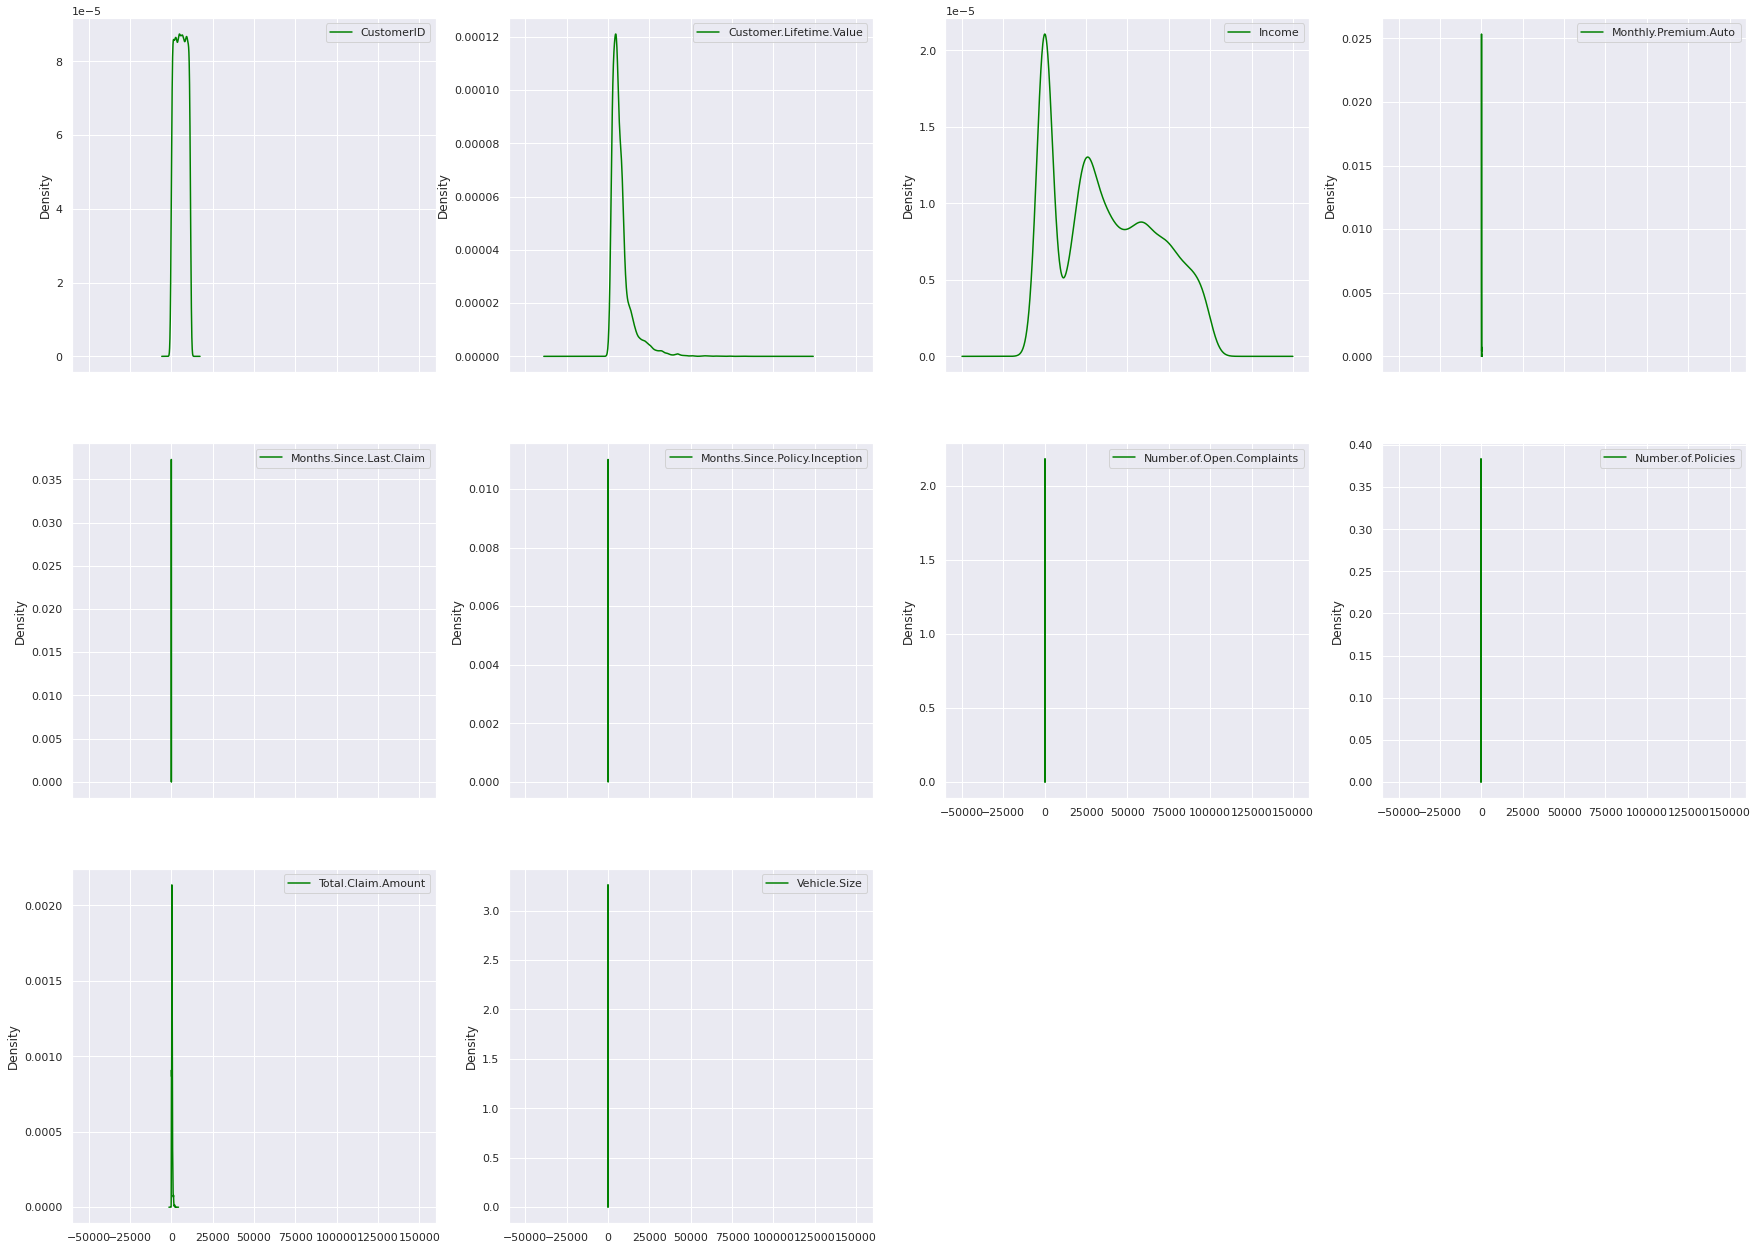

In [163]:
train.plot.kde(subplots = True, figsize = (30, 30),
                       layout = (4,4), color = "green");

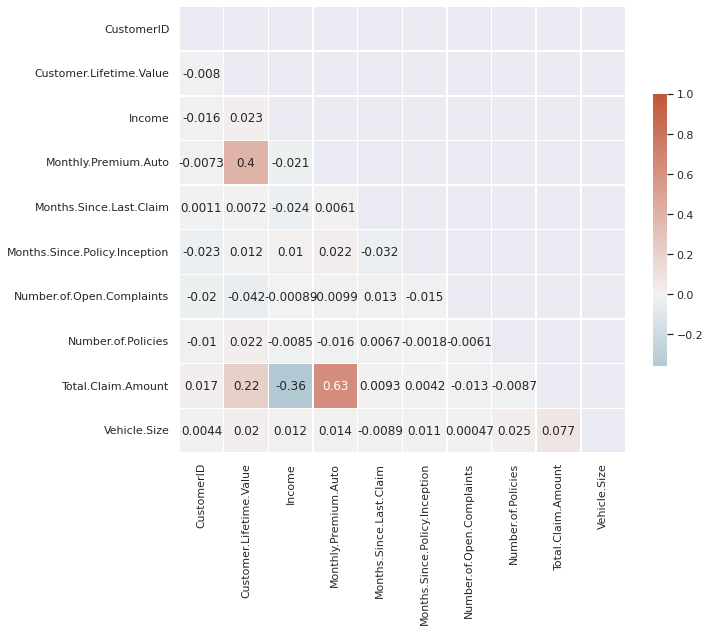

In [164]:
f, ax = plt.subplots(figsize=(10,10))
mat = train.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [165]:
def unnecessary(train):
   return train.drop("CustomerID",axis=1,inplace=True)

In [166]:
unnecessary(train)

In [167]:
train.columns

Index(['Customer.Lifetime.Value', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Income', 'Location.Geo', 'Location.Code', 'Marital.Status',
       'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [168]:
x=train.drop("Customer.Lifetime.Value",axis=1)
y=train["Customer.Lifetime.Value"]

In [169]:
from sklearn.feature_selection import f_regression, SelectKBest

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# preprocessing

In [171]:
cat_imputer=SimpleImputer(strategy="most_frequent")
cat_imputer.fit(x_train[cat_col])

SimpleImputer(strategy='most_frequent')

In [172]:
cat_train=pd.DataFrame(cat_imputer.transform(x_train[cat_col]),columns=cat_col)
cat_test=pd.DataFrame(cat_imputer.transform(x_test[cat_col]),columns=cat_col)

In [173]:
num_imputer=SimpleImputer(strategy="median")
num_imputer.fit(x_train[num_col])

SimpleImputer(strategy='median')

In [174]:
num_train=pd.DataFrame(num_imputer.transform(x_train[num_col]),columns=num_col)
num_test=pd.DataFrame(num_imputer.transform(x_test[num_col]),columns=num_col)

In [175]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def label(cat_train):
    for i in cat_train.columns:
       cat_train[i]=le.fit_transform(cat_train[i])

In [176]:
label(cat_train)

In [177]:
label(cat_test)

In [178]:
x_tr=pd.concat([num_train,cat_train],axis=1)

In [179]:
x_te=pd.concat([num_test,cat_test],axis=1)

# Model Building

In [180]:
from sklearn.linear_model import LinearRegression


In [181]:
def score(y_train,ypred,y_test,y_pred):
    print(f" training score:{np.sqrt(mean_squared_error(y_train,ypred))}")
    print(f" test score:{np.sqrt(mean_squared_error(y_test,y_pred))}")
    

In [182]:
def r2(y_train,ypred,y_test,y_pred):
    print(f" training score:{r2_score(y_train,ypred)}")
    print(f" test score:{r2_score(y_test,y_pred)}")

In [183]:
lr=LinearRegression()
lr.fit(x_tr,y_train)
ypred=lr.predict(x_tr)
y_pred=lr.predict(x_te)

In [184]:
score(y_train,ypred,y_test,y_pred)

 training score:6352.298428352549
 test score:6004.48769894347


In [185]:
r2(y_train,ypred,y_test,y_pred)

 training score:0.15847406263515762
 test score:0.15369659565633242


In [186]:
from sklearn.neighbors import KNeighborsRegressor

In [187]:
kn=KNeighborsRegressor()
kn.fit(x_tr,y_train)
ypred=kn.predict(x_tr)
y_pred=kn.predict(x_te)

In [188]:
score(y_train,ypred,y_test,y_pred)

 training score:5830.752045632409
 test score:6884.960083448646


In [189]:
r2(y_train,ypred,y_test,y_pred)

 training score:0.2909859078782282
 test score:-0.11269726974542138


In [190]:
from sklearn.tree import DecisionTreeRegressor

In [191]:
dt=DecisionTreeRegressor(max_depth=3)
dt.fit(x_tr,y_train)
ypred=dt.predict(x_tr)
y_pred=dt.predict(x_te)

In [192]:
score(y_train,ypred,y_test,y_pred)

 training score:4509.322305051207
 test score:4137.462184261125


In [193]:
r2(y_train,ypred,y_test,y_pred)

 training score:0.5759390558110726
 test score:0.5981701050622026


## Work on Test Data

In [194]:
test

,CustomerID,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,17,Basic,Bachelor,Employed,M,43836.0,"12.6,79.4",Rural,Single,73.0,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
1,19,Extended,College,Employed,F,28812.0,"17.3,78.4",Urban,Married,93.0,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize
2,29,Premium,Master,Employed,M,77026.0,"18.4,73.5",Urban,Married,110.0,...,82,2,3,Corporate Auto,Corporate L1,Offer2,Agent,472.029737,Four-Door Car,Medsize
3,34,Basic,Bachelor,Employed,F,24599.0,"17.1,78.2",Rural,Married,64.0,...,50,1,2,Corporate Auto,Corporate L2,Offer2,Branch,42.920271,Four-Door Car,Medsize
4,37,Extended,Bachelor,Disabled,F,13789.0,"13,80.1",Suburban,Divorced,79.0,...,49,0,1,Personal Auto,Personal L3,Offer4,Call Center,379.200000,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,11553,Basic,Bachelor,Employed,F,61896.0,"19.4,72.8",Urban,Married,104.0,...,97,0,1,Personal Auto,Personal L2,Offer4,Call Center,461.306722,SUV,Medsize
1763,11557,Basic,Doctor,Employed,F,39317.0,"19.4,71.9",Rural,Single,64.0,...,46,0,1,Personal Auto,Personal L2,Offer2,Branch,77.695607,Four-Door Car,Medsize
1764,11559,Basic,Bachelor,Employed,F,30205.0,"19.2,74.3",Suburban,Single,195.0,...,1,0,4,Personal Auto,Personal L3,Offer1,Agent,1329.957905,Luxury SUV,Large
1765,11570,Extended,College,Employed,M,36918.0,"18.9,72.7",Suburban,Divorced,76.0,...,77,3,3,Personal Auto,Personal L1,Offer1,Branch,364.800000,Two-Door Car,Medsize


In [195]:
unnecessary(test)

In [196]:
cat_imputer=SimpleImputer(strategy="most_frequent")
cat_imputer.fit(test[cat_col])

SimpleImputer(strategy='most_frequent')

In [197]:
cat_train=pd.DataFrame(cat_imputer.transform(test[cat_col]),columns=cat_col)

In [198]:
num_imputer=SimpleImputer(strategy="median")
num_imputer.fit(test[num_col])

SimpleImputer(strategy='median')

In [199]:
num_train=pd.DataFrame(num_imputer.transform(test[num_col]),columns=num_col)

In [200]:
label(cat_train)

In [201]:
te=pd.concat([num_train,cat_train],axis=1)

In [202]:
te

,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Coverage,Education,EmploymentStatus,Gender,Location.Geo,Location.Code,Marital.Status,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Vehicle.Class,Vehicle.Size
0,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879,0,0,1,1,18,0,2,1,3,0,0,0,1
1,28812.0,93.0,17.0,7.0,0.0,8.0,425.527834,1,1,1,0,291,2,1,2,7,1,1,0,1
2,77026.0,110.0,9.0,82.0,2.0,3.0,472.029737,2,4,1,1,475,2,1,0,0,1,0,0,1
3,24599.0,64.0,12.0,50.0,1.0,2.0,42.920271,0,0,1,0,234,0,1,0,1,1,1,0,1
4,13789.0,79.0,8.0,49.0,0.0,1.0,379.200000,1,0,0,0,60,1,0,1,5,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,61896.0,104.0,25.0,97.0,0.0,1.0,461.306722,0,0,1,0,746,2,1,1,4,3,2,3,1
1763,39317.0,64.0,22.0,46.0,0.0,1.0,77.695607,0,2,1,0,739,0,2,1,4,1,1,0,1
1764,30205.0,195.0,24.0,1.0,0.0,4.0,1329.957905,0,0,1,0,702,1,2,1,5,0,0,2,0
1765,36918.0,76.0,28.0,77.0,3.0,3.0,364.800000,1,1,1,1,596,1,0,1,3,0,1,5,1


In [203]:
pred=dt.predict(te)


In [210]:
sub["Customer.Lifetime.Value"]=pred

In [211]:
sub.to_csv("DecissionTree.csv",index=False)

In [204]:
from xgboost import XGBRegressor

In [205]:
xg=XGBRegressor()
xg.fit(x_tr,y_train)
ypred=xg.predict(x_tr)
y_pred=xg.predict(x_te)

[11:45:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [206]:
score(y_train,ypred,y_test,y_pred)

 training score:3808.9498180658898
 test score:3752.9310808619084


In [207]:
r2(y_train,ypred,y_test,y_pred)

 training score:0.6974367179832504
 test score:0.6693904860465456


In [208]:
sub["Customer.Lifetime.Value"]=pred

In [209]:
sub.to_csv("xGBReg.csv",index=False)

In [212]:
pred1=dt.predict(te)

In [213]:
sub["Customer.Lifetime.Value"]=pred1

In [214]:
sub.to_csv("DT.csv",index=False)

In [ ]:
sub["Customer.Lifetime.Value"]=pred

In [215]:
pred3=lr.predict(te)

In [217]:
sub["Customer.Lifetime.Value"]=pred3

In [218]:
sub.to_csv("lr.csv",index=False)

In [220]:
pred4=kn.predict(te)

In [221]:
sub["Customer.Lifetime.Value"]=pred4

In [222]:
sub.to_csv("kn.csv",index=False)

## Conclusion

From the above process we can conclude that Extreme Gradiant Boosting is having the best result.